<a href="https://colab.research.google.com/github/PCeltide/Coursera/blob/main/Machine%20Learning%20and%20Reinforcement%20Learning%20in%20Finance%20Specialization/Guided%20Tour%20of%20Machine%20Learning%20in%20Finance/Module_Two_Euclidean_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Euclidean Distance

## Dataset
Suppose we have a $n$ dimensional space $\mathbb{R}^{n}$, we want to generate $1000000$ pairs of uniformly distributed random
numbers $X\sim\mathscr{U}\left(0,\:1\right)$.

For instance, if $n=1$, we generate $p_{1}=\left(x_{1},\:y_{1}\right)$, $p_{2}=\left(x_{2},\:y_{2}\right)$, $\cdots$, $p_{1000000}=\left(x_{1000000},\:y_{1000000}\right)$, where $x_{1}$, $x_{2}$, $\cdots$, $x_{1000000}$ are uniformly distributed, $y_{1}$, $y_{2}$, $\cdots$, $y_{1000000}$ are uniformly distributed too.

If $n=2$, we generate $\mathbf{p}_{1}=\left(\mathbf{x}_{1},\:\mathbf{y}_{1}\right)$, where $\mathbf{x}_{1}=\left(x_{1}^{\left(1\right)},\:x_{1}^{\left(2\right)}\right)$ and $\mathbf{y}_{1}=\left(y_{1}^{\left(1\right)},\:y_{1}^{\left(2\right)}\right)$, $\mathbf{p}_{2}=\left(\mathbf{x}_{2},\:\mathbf{y}_{2}\right)$, where $\mathbf{x}_{2}=\left(x_{2}^{\left(1\right)},\:x_{2}^{\left(2\right)}\right)$ and $\mathbf{y}_{2}=\left(y_{2}^{\left(1\right)},\:y_{2}^{\left(2\right)}\right)$, $\cdots$, $\mathbf{p}_{1000000}=\left(\mathbf{x}_{1000000},\:\mathbf{y}_{1000000}\right)$, where $\mathbf{x}_{1000000}=\left(x_{1000000}^{\left(1\right)},\:x_{1000000}^{\left(2\right)}\right)$ and $\mathbf{y}_{1000000}=\left(y_{1000000}^{\left(1\right)},\:y_{1000000}^{\left(2\right)}\right)$, and $x_{1}^{\left(1\right)}$, $x_{2}^{\left(1\right)}$, $\cdots$, $x_{1000000}^{\left(1\right)}$ are uniformly distributed, $x_{1}^{\left(2\right)}$, $x_{2}^{\left(2\right)}$, $\cdots$, $x_{1000000}^{\left(2\right)}$ are uniformly distributed, $y_{1}^{\left(1\right)}$, $y_{2}^{\left(1\right)}$, $\cdots$, $y_{1000000}^{\left(1\right)}$ are uniformly distributed, and $y_{1}^{\left(2\right)}$, $y_{2}^{\left(2\right)}$, $\cdots$, $y_{1000000}^{\left(2\right)}$ are uniformly distributed too.

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.metrics.pairwise import euclidean_distances

import sys
sys.path.append("..")
import grading

import timeit
import matplotlib.mlab
import scipy.stats
from scipy.stats import norm

In [ ]:
TIMEOUT_UPPER = 1800

In [ ]:
# Given Function
def euclidean_distances_stats(euclidean_distances_vector):
    """
    Calculate Euclidean distances statistics

    Arguments:
    euclidean_distances_vector - 1-D vector of Euclidean distances

    Return:
        np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtosis of the distribution
    """
    if len(euclidean_distances_vector) > 0:
        this_mean = np.mean( euclidean_distances_vector )
        this_variance = np.var( euclidean_distances_vector )
        this_skewness = scipy.stats.skew( euclidean_distances_vector)
        this_kurtosis = scipy.stats.kurtosis( euclidean_distances_vector)
        result = np.array([this_mean, this_variance, this_skewness, this_kurtosis])
    else:
        result = np.array([0.] * 4)
    return result


def print_stats(euclidean_stats):
    """
    Print Euclidean distances statistics

    Arguments:
    euclidean_stats - np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution
    """
    this_mean = euclidean_stats[0]
    this_variance = euclidean_stats[1]
    this_skewness = euclidean_stats[2]
    this_kurtosis = euclidean_stats[3]
    print( 'Expectation of Euclidean distances: ', this_mean, '\n' )
    print( 'Variance of Euclidean distances: ', this_variance, '\n' )
    print( 'Skewness of Euclidean distances: ', this_skewness, '\n' )
    print( 'Kurtosis of Euclidean distances: ',this_kurtosis, '\n' )


def plot_distribution(euclidean_distances_vector, euclidean_stats, dim_space, bins_number=30):
    """
    Plot histogram of Euclidean distances against normal distribution PDF

    Arguments:

    euclidean_distances_vector - 1-D vector of Euclidean distances

    euclidean_stats - np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution

    dim_space - dimension of the space
    bins_number - number of bins in the histogram
    """
    # verbose, but this is for clarity
    this_mean = euclidean_stats[0]
    this_variance = euclidean_stats[1]
    this_skewness = euclidean_stats[2]
    this_kurtosis = euclidean_stats[3]

    sample_size = len(euclidean_distances_vector)
    try:
        fig_l, ax_l = plt.subplots()
        n_bins_l, bins_l, patches_l = ax_l.hist( euclidean_distances_vector, bins_number, normed=1 )
        y_l = matplotlib.mlab.normpdf( bins_l, this_mean, np.sqrt( this_variance ) )
        ax_l.plot( bins_l, y_l, 'r--' )
        plt.title( 'Histogram for dimension = %d and sample size = %d \n $\mu$ = %.3f, $\sigma^2$ = %.3f, Skewness = %.3f, Kurtosis = %.3f' \
                                           % (dim_space, sample_size, this_mean, this_variance, this_skewness, this_kurtosis ) )
        fig_l.tight_layout()
        plt.grid( True, which='both')
        plt.minorticks_on()
        return fig_l
    except:
        return None

In [ ]:
lower_boundary = 0
upper_boundary = 1
n = 5 # dimension
sample_size = 10000

X = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, n) )
Y = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, n) )

print( 'X: ', X )
print( 'Y: ', Y )

X:  [[ 0.1281527   0.90874596  0.30895767  0.55074684  0.37021404]
 [ 0.99737217  0.67418859  0.15589377  0.07779588  0.67164309]
 [ 0.28886264  0.98143785  0.24453147  0.86864977  0.22916086]
 ..., 
 [ 0.15923867  0.38782267  0.80740141  0.76214834  0.63993568]
 [ 0.2720833   0.93914681  0.05687483  0.65465918  0.85339501]
 [ 0.30486807  0.26274335  0.01023201  0.51821297  0.38689877]]
Y:  [[ 0.01564132  0.80624259  0.14556196  0.31919336  0.4873302 ]
 [ 0.39136766  0.50796378  0.66473161  0.114402    0.40721235]
 [ 0.86981803  0.96477091  0.0517566   0.69251565  0.82818192]
 ..., 
 [ 0.613376    0.28887205  0.26333635  0.59140505  0.52506754]
 [ 0.50715243  0.46967336  0.39198272  0.41477971  0.84465243]
 [ 0.50855446  0.95756686  0.51458543  0.2723617   0.99904058]]


## Part 1
Calculate the Euclidean distance between the two points of each pair. Do this in a loop. Hint: use sklearn to do the computation.

Plot the histogram of the Euclidean distance. In a $n$ dimensional space $\mathbb{R}^{n}$, the Euclidean distance between $\mathbf{x}=\left(x_{1},\:x_{2},\:\cdots,\:x_{n}\right)$ and $\mathbf{y}=\left(y_{1},\:y_{2},\:\cdots,\:y_{n}\right)$ is given
by
\begin{equation}
\begin{aligned}d_{E}\left(\mathbf{p},\:\mathbf{q}\right) & =\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}+\cdots+\left(x_{n}-y_{n}\right)^{2}}\\
 & =\sqrt{\sum_{i=1}^{n}\left(x_{i}-y_{i}\right)^{2}}\\
 & =\left\Vert \mathbf{x}-\mathbf{y}\right\Vert _{2}
\end{aligned}
\end{equation}

In [ ]:
start = timeit.default_timer()
# Using the euclidean_distances function, we get back a N x N matrix of pairwise Euclidean Distances
# The one we want is the diagonal
euclidean_distances_vector_l = np.diag(euclidean_distances(X,Y))

stop = timeit.default_timer()
print( 'Running time: ', stop-start )

Running time:  3.7990769509924576


In [ ]:
result = euclidean_distances_stats(euclidean_distances_vector_l)
result

array([ 0.87808254,  0.06156054, -0.05757301, -0.29055564])

Expectation of Euclidean distances:  0.878082536155 

Variance of Euclidean distances:  0.0615605438302 

Skewness of Euclidean distances:  -0.0575730112866 

Kurtosis of Euclidean distances:  -0.29055563764 



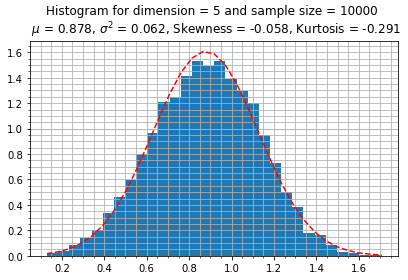

In [ ]:
print_stats(result)
plot_distribution(euclidean_distances_vector_l, result, n)
try:
    plt.show()
except: pass

## Part 2
Calculate the Euclidean distance between the two points of each pair using vectorized operations and inner product.

In [ ]:
# using vectorization by calculating inner product
start = timeit.default_timer()

# We can simply use the norm instead for a faster, efficient calculation
euclidean_distances_vector_l_vectorized = np.linalg.norm(X - Y, axis=1)

stop = timeit.default_timer()
print( 'Running time: ', stop-start )

Running time:  0.0009430229547433555


In [ ]:
result = euclidean_distances_stats(euclidean_distances_vector_l_vectorized)
result

array([ 0.87808254,  0.06156054, -0.05757301, -0.29055564])

In [ ]:
print_stats(result)

Expectation of Euclidean distances:  0.878082536155 

Variance of Euclidean distances:  0.0615605438302 

Skewness of Euclidean distances:  -0.0575730112866 

Kurtosis of Euclidean distances:  -0.29055563764 



## Question 3
We repeat question 1 and question 2 for $n=1$, $n=5$, $n=10$, $n=100$, $n=1000$, $n=5000$, and $n=10000$. Then plot the expectation and variance as a function of $n$.
You need to generate two sets of n-dimensional samples, compute

In [ ]:
def VectorizationMethod(dim_space, sample_size, lower_boundary, upper_boundary, bins_number=30):
    """
    Generate sample_size elements from dim_space-dimensional space. The coordinates of each element in the space
    are sampled from uniform distribution between lower_boundary and upper_boundary

    Arguments:

    dim_space - dimension of the space, a positive integer
    sample_size - number of samples in the dim_space-dimensional space
    lower_boundary - lower boundary of coordinates sampled from U(lower_boundary, upper_boundary)
    upper_boundary - lower boundary of coordinates sampled from U(lower_boundary, upper_boundary)
    bins_number - number of bins to plot a histogram

    stats_result - np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution
    """

    # We get samples for each dimension
    A = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, dim_space) )
    B = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, dim_space) )

    euclidean_distances_vector_v = np.linalg.norm(A - B, axis=1)

    ### END CODE HERE ###
    stats_result = euclidean_distances_stats(euclidean_distances_vector_v)
    return tuple(stats_result.tolist())

In [ ]:
# Given Fucntion
start = timeit.default_timer()

sample_size = 10000
lower_boundary = 0
upper_boundary = 1
dimension_vector = [2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000]
n_dims = len(dimension_vector)

euclidean_distances_mean_vector = [np.nan] * n_dims
euclidean_distances_variance_vector = [np.nan] * n_dims
euclidean_distances_skewness_vector = [np.nan] * n_dims
euclidean_distances_kurtosis_vector = [np.nan] * n_dims

for idx, space_dims in enumerate(dimension_vector):

    # using vectorization
    euclidean_distances_mean, euclidean_distances_variance, euclidean_distances_skewness, euclidean_distances_kurtosis = \
                 VectorizationMethod( space_dims, sample_size, lower_boundary, upper_boundary )

    euclidean_distances_mean_vector[idx] = euclidean_distances_mean
    euclidean_distances_variance_vector[idx] = euclidean_distances_variance
    euclidean_distances_skewness_vector[idx] = euclidean_distances_skewness
    euclidean_distances_kurtosis_vector[idx] = euclidean_distances_kurtosis

    print( 'Calculating finished for sample size = %d, dimension = %d\n' %( sample_size, space_dims) )

stop = timeit.default_timer()
print( 'Running time: ', stop-start )

Calculating finished for sample size = 10000, dimension = 2

Calculating finished for sample size = 10000, dimension = 5

Calculating finished for sample size = 10000, dimension = 10

Calculating finished for sample size = 10000, dimension = 20

Calculating finished for sample size = 10000, dimension = 40

Calculating finished for sample size = 10000, dimension = 60

Calculating finished for sample size = 10000, dimension = 80

Calculating finished for sample size = 10000, dimension = 100

Calculating finished for sample size = 10000, dimension = 200

Calculating finished for sample size = 10000, dimension = 400

Calculating finished for sample size = 10000, dimension = 600

Calculating finished for sample size = 10000, dimension = 800

Calculating finished for sample size = 10000, dimension = 1000

Running time:  1.5419386709691025


In [ ]:
euclidean_distances_mean_vector

[0.5210231097540792,
 0.8781136911286529,
 1.2682481853010867,
 1.8137164912306238,
 2.571573442810232,
 3.1538909479062704,
 3.6398527509604057,
 4.074606897477151,
 5.766826936614616,
 8.160388653555474,
 9.99808982583997,
 11.54537979460452,
 12.903958705492329]

In [ ]:
euclidean_distances_variance_vector

[0.061204329667580215,
 0.061202915543531196,
 0.062471752871792637,
 0.05849337062829725,
 0.06002627742074167,
 0.05874839557073257,
 0.05898016796300599,
 0.05728030413301467,
 0.06081589570812216,
 0.05738994407059563,
 0.058568024798334284,
 0.060296229090606286,
 0.05852826695927087]

In [ ]:
euclidean_distances_skewness_vector

[0.17776713012589057,
 -0.061170136601334614,
 -0.03856116025172629,
 -0.05484209136834022,
 -0.04923312383063614,
 0.00948197629323254,
 -0.040877910324235524,
 -0.009484531436841671,
 0.01769609917122802,
 -0.03268715785552144,
 -0.013442210119618722,
 0.004858324034606821,
 -0.03709094587601927]

In [ ]:
euclidean_distances_kurtosis_vector

[-0.6560096299514613,
 -0.3390373489792764,
 -0.13751179569153127,
 -0.0626981670753275,
 0.050718440996087466,
 -0.09136120383971402,
 -0.02344760316607486,
 0.016608655545412354,
 -0.027599063797072,
 0.0038971686836495323,
 0.07176814081430827,
 -0.030270048241212155,
 0.04807175197190405]

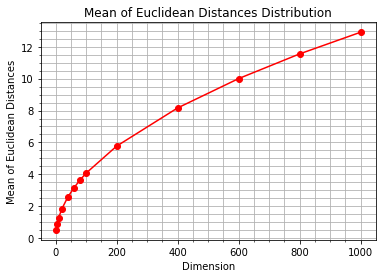

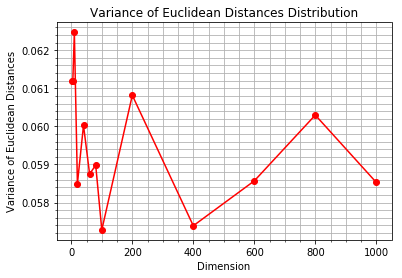

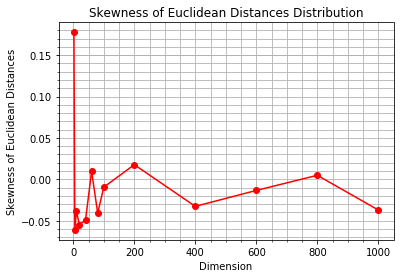

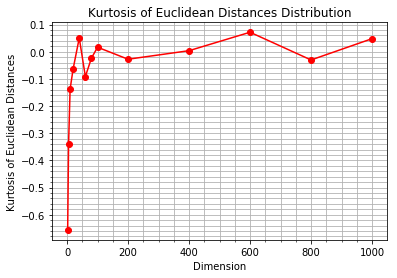

In [ ]:
# here we plot the stats for different sample sizes
try:
    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_mean_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Mean of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Mean of Euclidean Distances' )

    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_variance_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Variance of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Variance of Euclidean Distances' )

    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_skewness_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Skewness of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Skewness of Euclidean Distances' )

    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_kurtosis_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Kurtosis of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Kurtosis of Euclidean Distances' )

    matplotlib.pyplot.show()
except: pass